In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# Load Date

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [10]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [14]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((11610, 8), (3870, 8), (5160, 8), (11610,), (3870,), (5160,))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
X_train.shape

(11610, 8)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [56]:
# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae',"accuracy"])
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mae',"accuracy"])

In [57]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 2.5430 - mae: 1.1628 - accuracy: 0.0023 - val_loss: 0.6355 - val_mae: 0.5005 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4843 - mae: 0.4965 - accuracy: 0.0021 - val_loss: 0.5806 - val_mae: 0.4636 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4090 - mae: 0.4492 - accuracy: 0.0025 - val_loss: 0.5595 - val_mae: 0.4386 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.3835 - mae: 0.4403 - accuracy: 0.0030 - val_loss: 3.1978 - val_mae: 0.4531 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3752 - mae: 0.4339 - accuracy: 0.0017 - val_loss: 2.9827 - val_mae: 0.4590 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3850 - mae: 0.4298 - accuracy: 0.0033 - val_loss: 2.14

In [58]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3069 - mae: 0.3794 - accuracy: 0.0021


In [59]:
print(model.metrics_names)
print(model_history.params)
print(model_history.history.keys())

['loss', 'mae', 'accuracy']
{'verbose': 1, 'epochs': 20, 'steps': 363}
dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy'])


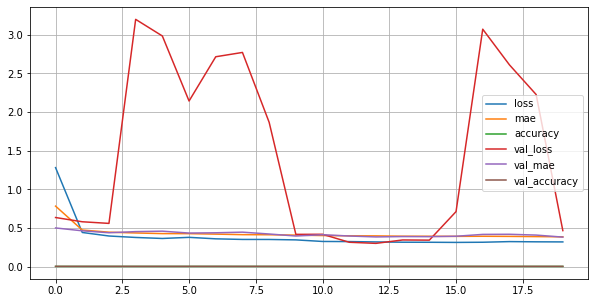

In [60]:
pd.DataFrame(model_history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

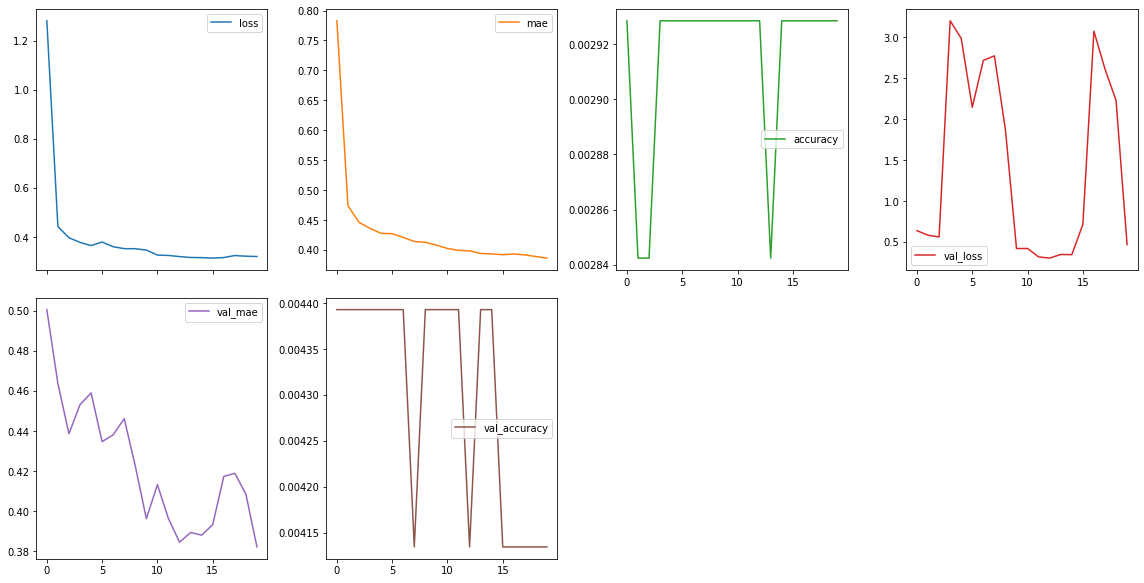

In [61]:
pd.DataFrame(model_history.history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

# Test

In [62]:
X_new = X_test[:3]

In [63]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.57038283]
 [1.3097042 ]
 [4.5196466 ]]
[0.477   0.458   5.00001]


In [64]:
del model

In [65]:
keras.backend.clear_session()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [66]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

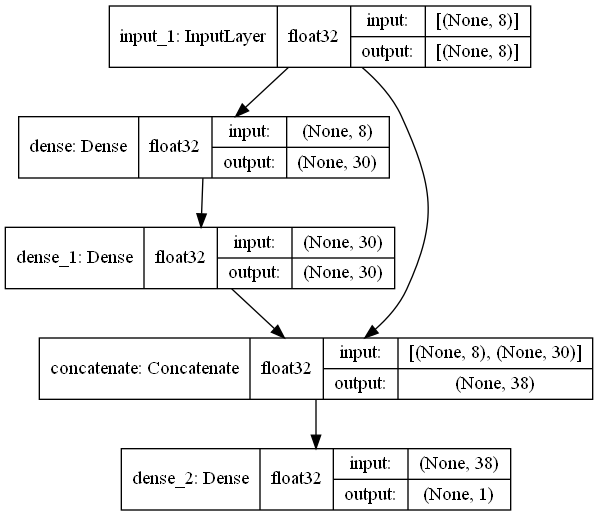

In [68]:
keras.utils.plot_model(model, to_file='model_Functional_API.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [69]:
# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mae',"accuracy"])

In [70]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 4s 9ms/step - loss: 2.4698 - mae: 1.1501 - accuracy: 0.0022 - val_loss: 0.5129 - val_mae: 0.5001 - val_accuracy: 0.0044
Epoch 2/30
363/363 [==============================] - 3s 8ms/step - loss: 0.4830 - mae: 0.4975 - accuracy: 0.0021 - val_loss: 0.9171 - val_mae: 0.4708 - val_accuracy: 0.0044
Epoch 3/30
363/363 [==============================] - 3s 8ms/step - loss: 0.4096 - mae: 0.4501 - accuracy: 0.0026 - val_loss: 0.3904 - val_mae: 0.4265 - val_accuracy: 0.0044
Epoch 4/30
363/363 [==============================] - 3s 8ms/step - loss: 0.3769 - mae: 0.4379 - accuracy: 0.0030 - val_loss: 0.3929 - val_mae: 0.4198 - val_accuracy: 0.0044
Epoch 5/30
363/363 [==============================] - 3s 8ms/step - loss: 0.3704 - mae: 0.4303 - accuracy: 0.0017 - val_loss: 0.3670 - val_mae: 0.4174 - val_accuracy: 0.0044
Epoch 6/30
363/363 [==============================] - 3s 8ms/step - loss: 0.3470 - mae: 0.4188 - accuracy: 0.0033 - val_loss: 0.45

In [71]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.2929 - mae: 0.3783 - accuracy: 0.0021


In [72]:
print(model.metrics_names)
print(model_history.params)
print(model_history.history.keys())

['loss', 'mae', 'accuracy']
{'verbose': 1, 'epochs': 30, 'steps': 363}
dict_keys(['loss', 'mae', 'accuracy', 'val_loss', 'val_mae', 'val_accuracy'])


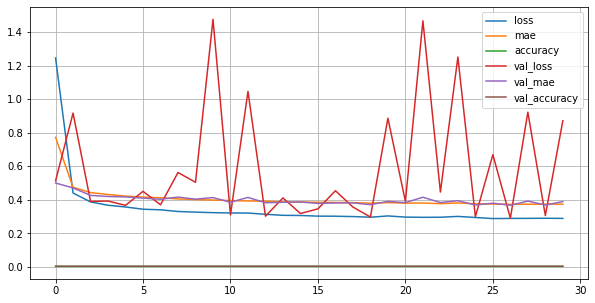

In [73]:
pd.DataFrame(model_history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

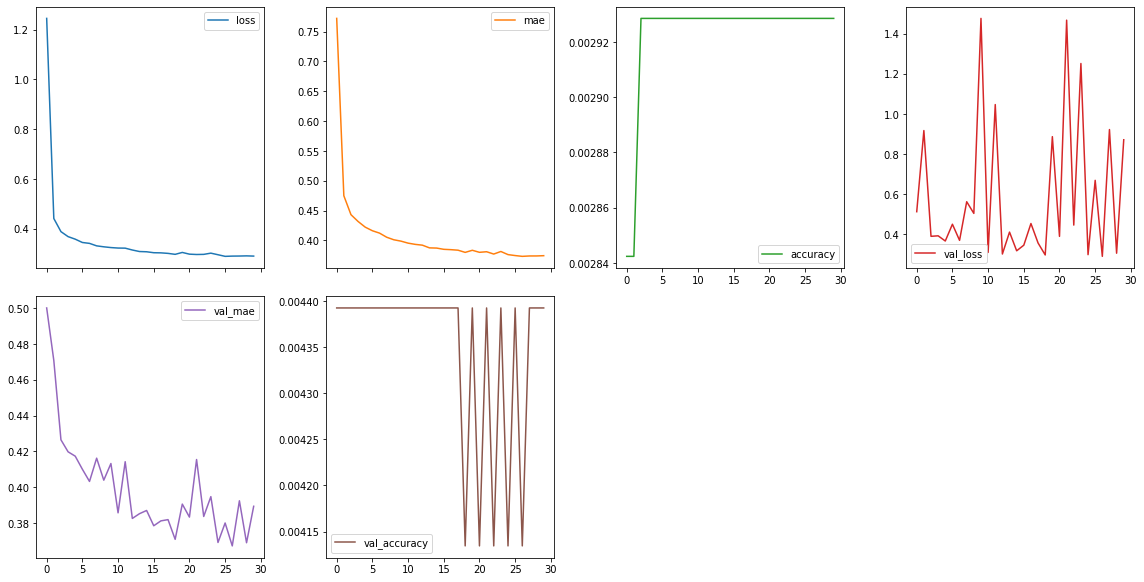

In [75]:
pd.DataFrame(model_history.history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

In [78]:
X_new = X_test[:3]

In [80]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5262564]
 [1.2032909]
 [4.381701 ]]
[0.477   0.458   5.00001]


In [ ]:
del model

In [ ]:
keras.backend.clear_session()

# Saving and Restoring

In [77]:
pwd

'e:\\UDEMY_3\\Computer Vision && Image Processing\\LAB\\venv\\11-Neural_Networks (Start-Tech Academy)'

In [7]:
%cd C:\\Users\\pukhr

C:\Users\pukhr


In [81]:
model.save("my_Func_model.h5")

In [82]:
del model

In [83]:
keras.backend.clear_session()

In [84]:
model = keras.models.load_model("my_Func_model.h5")

In [85]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [87]:
y_pred = model.predict(X_new)
print (y_pred)

[[0.5262564]
 [1.2032909]
 [4.381701 ]]


# Using Callbacks during Training

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [60]:
# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['mae'])
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mae',"accuracy"])

In [61]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [62]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 113us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4586 - val_

In [63]:
del model
keras.backend.clear_session()

In [8]:
model = keras.models.load_model("Model-10.h5")

In [91]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

In [16]:
print (mse_test)

0.43821001052856445


In [15]:
model.metrics_names

['loss']

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_diff=y_pred-y_test

In [26]:
y_pred.shape

(5160, 1)

In [ ]:
mse = (y_diff^2)

### Best Model Only

In [66]:
del model
keras.backend.clear_session()

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [68]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [69]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [70]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 96us/sample - loss: 1.4530 - val_loss: 0.7972
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7402 - val_loss: 0.6640
Epoch 3/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.6512 - val_loss: 0.6182
Epoch 4/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5951 - val_loss: 0.5563
Epoch 5/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5534 - val_loss: 0.5014
Epoch 6/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5197 - val_loss: 0.4723
Epoch 7/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4930 - val_loss: 0.4516
Epoch 8/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4724 - val_loss: 0.4380
Epoch 9/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4559 - val_l

In [92]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

### Best Model Only

In [72]:
del model
keras.backend.clear_session()

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [74]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [75]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [76]:
# patience: Number of epochs with no improvement after which training will be stopped.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [77]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 111us/sample - loss: 2.5576 - val_loss: 2.2008
Epoch 2/200
11610/11610 [==============================] - 1s 59us/sample - loss: 1.0781 - val_loss: 0.8693
Epoch 3/200
11610/11610 [==============================] - 1s 67us/sample - loss: 0.8431 - val_loss: 0.8327
Epoch 4/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.7697 - val_loss: 0.7867
Epoch 5/200
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7245 - val_loss: 0.6680
Epoch 6/200
11610/11610 [==============================] - 1s 64us/sample - loss: 0.6849 - val_loss: 0.6689
Epoch 7/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.6512 - val_loss: 0.6133
Epoch 8/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.6212 - val_loss: 0.5908
Epoch 9/200
11610/11610 [==============================] - 1s 57us/sample - loss: 0.59

In [93]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)